<a href="https://colab.research.google.com/github/noctxrne/ICT-Notes/blob/main/13_Data_Pre_Processing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pre-processing**

**Data Cleaning** : Missing values,Noisy data

**Data transformation** : Normalization, Attribute Selection

**Data reduction** : Dimensionality reduction

Code:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation


In [ ]:
dict={"First Score":[100,90,np.nan,95,np.nan],
      "Second Score": [30,45,56,np.nan,np.nan],
      "Third Score":[np.nan,40,80,98,np.nan],
      "Fourth Score":[np.nan,np.nan,np.nan,65,np.nan],
      "Fifth Score":[12,15,18,43,54]}
df=pd.DataFrame(dict)
df.head()

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,NaN,98.0,65.0,43
4,NaN,NaN,NaN,NaN,54


In [ ]:
df1=df.copy()

In [ ]:
df1.fillna(50)

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,50.0,50.0,12
1,90.0,45.0,40.0,50.0,15
2,50.0,56.0,80.0,50.0,18
3,95.0,50.0,98.0,65.0,43
4,50.0,50.0,50.0,50.0,54


In [ ]:
df1.ffill()

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,90.0,56.0,80.0,NaN,18
3,95.0,56.0,98.0,65.0,43
4,95.0,56.0,98.0,65.0,54


In [ ]:
df1.bfill()

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,40.0,65.0,12
1,90.0,45.0,40.0,65.0,15
2,95.0,56.0,80.0,65.0,18
3,95.0,NaN,98.0,65.0,43
4,NaN,NaN,NaN,NaN,54


In [ ]:
replace_value={'First Score':10.1,
               'Second Score':30.1}
df1.fillna(replace_value)

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,10.1,56.0,80.0,NaN,18
3,95.0,30.1,98.0,65.0,43
4,10.1,30.1,NaN,NaN,54


In [ ]:
df1.mean()

,0
First Score,95.000000
Second Score,43.666667
Third Score,72.666667
Fourth Score,65.000000
Fifth Score,28.400000


In [ ]:
df.fillna(df1.mean())

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.000000,72.666667,65.0,12
1,90.0,45.000000,40.000000,65.0,15
2,95.0,56.000000,80.000000,65.0,18
3,95.0,43.666667,98.000000,65.0,43
4,95.0,43.666667,72.666667,65.0,54


In [ ]:
df.fillna(df1.median())

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,80.0,65.0,12
1,90.0,45.0,40.0,65.0,15
2,95.0,56.0,80.0,65.0,18
3,95.0,45.0,98.0,65.0,43
4,95.0,45.0,80.0,65.0,54


In [ ]:
df1['First Score'].fillna(df1['Fourth Score'])

,First Score
0,100.0
1,90.0
2,NaN
3,95.0
4,NaN


In [ ]:
df1

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,NaN,98.0,65.0,43
4,NaN,NaN,NaN,NaN,54


In [ ]:
(df1['First Score'].isna()) & (df1['Fifth Score']>20)

,0
0,False
1,False
2,False
3,False
4,True


In [ ]:
df1.loc[df1['First Score'].isna() & (df1['Fifth Score']>20),'First Score']=250
df1

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,NaN,98.0,65.0,43
4,250.0,NaN,NaN,NaN,54


In [ ]:
employees=pd.read_csv("/content/hr_employees.csv")
employees

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,NaN,HR,42000.0,3.0,Masters
2,103,35.0,Finance,NaN,NaN,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,NaN,HR,45000.0,2.0,Bachelors


In [ ]:
employees.isna().sum()

,0
EmployeeID,0
Age,2
Department,0
Salary,1
Experience,1
Education,1


In [ ]:
employees['Age'] = employees['Age'].fillna(employees['Age'].mean())

In [ ]:
employees

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.000000,IT,50000.0,5.0,Bachelors
1,102,35.333333,HR,42000.0,3.0,Masters
2,103,35.000000,Finance,NaN,NaN,NaN
3,104,42.000000,IT,60000.0,10.0,PhD
4,105,35.333333,HR,45000.0,2.0,Bachelors


In [ ]:
employees.fillna({'Age':employees['Age'].mean()},inplace=True)
employees

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.000000,IT,50000.0,5.0,Bachelors
1,102,35.333333,HR,42000.0,3.0,Masters
2,103,35.000000,Finance,NaN,NaN,NaN
3,104,42.000000,IT,60000.0,10.0,PhD
4,105,35.333333,HR,45000.0,2.0,Bachelors


In [ ]:
employees.loc[employees['Salary'].isna() & (employees['Experience']>5),'Salary']=(employees['Salary'].mean()+(employees['Experience']*1000))
employees

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.000000,IT,50000.0,5.0,Bachelors
1,102,35.333333,HR,42000.0,3.0,Masters
2,103,35.000000,Finance,NaN,NaN,NaN
3,104,42.000000,IT,60000.0,10.0,PhD
4,105,35.333333,HR,45000.0,2.0,Bachelors


In [ ]:
beer=pd.read_csv("/content/beer-servings.csv")
beer

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
beer.shape

(193, 7)

In [ ]:
num_cols=beer.select_dtypes(include='float64')
num_cols

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9
...,...,...,...,...
188,NaN,100.0,3.0,7.7
189,111.0,2.0,1.0,2.0
190,6.0,0.0,0.0,0.1
191,32.0,19.0,4.0,2.5


In [ ]:
beer.isna().sum

<bound method DataFrame.sum of      Unnamed: 0  country  beer_servings  spirit_servings  wine_servings  \
0         False    False          False            False          False   
1         False    False          False            False          False   
2         False    False          False            False          False   
3         False    False          False            False          False   
4         False    False          False            False          False   
..          ...      ...            ...              ...            ...   
188       False    False           True            False          False   
189       False    False          False            False          False   
190       False    False          False            False          False   
191       False    False          False            False          False   
192       False    False          False            False          False   

     total_litres_of_pure_alcohol  continent  
0                           False      False  
1                           False      False  
2                           False      False  
3                           False      False  
4                           False      False  
..                            ...        ...  
188                         False      False  
189                         False      False  
190                         False      False  
191                         False      False  
192                         False      False  

[193 rows x 7 columns]>

array([[<Axes: title={'center': 'beer_servings'}>,
        <Axes: title={'center': 'spirit_servings'}>],
       [<Axes: title={'center': 'wine_servings'}>,
        <Axes: title={'center': 'total_litres_of_pure_alcohol'}>]],
      dtype=object)

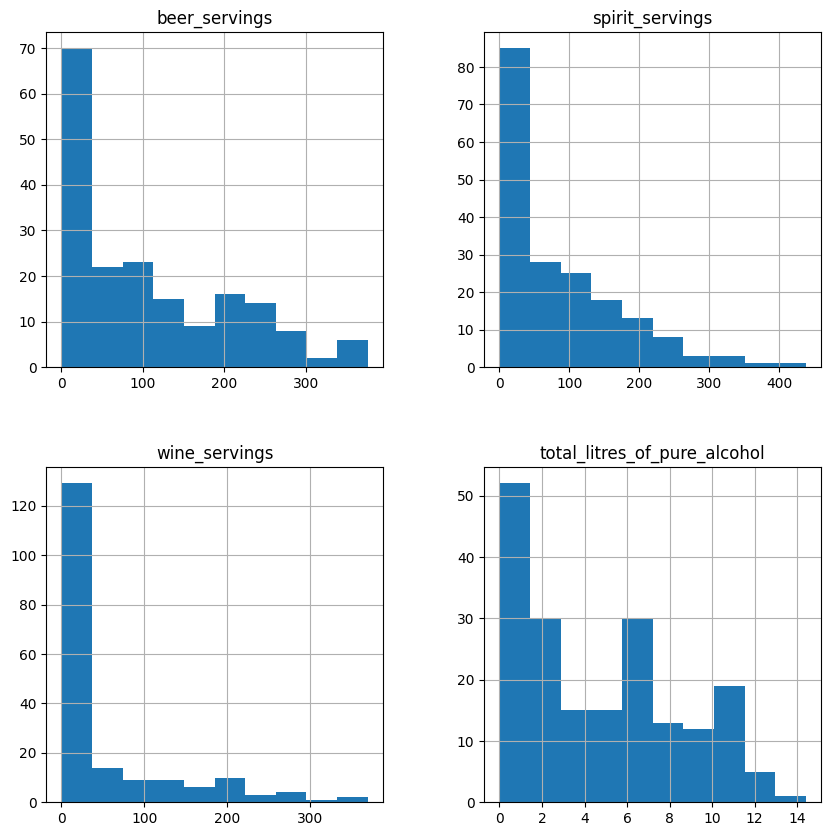

In [ ]:
num_cols.hist(figsize=(10,10))

In [ ]:
beer.fillna({'beer_servings':beer['beer_servings'].median(),
            'spirit_servings':beer['spirit_servings'].median(),
            'wine_servings':beer['wine_servings'].median(),
            'total_litres_of_pure_alcohol':beer['total_litres_of_pure_alcohol'].median()},inplace=True)
beer

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,76.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
#Same as the abpve line of code
cols=['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
beer.fillna({col:beer[col].median() for col in cols},inplace=True)
beer

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,76.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


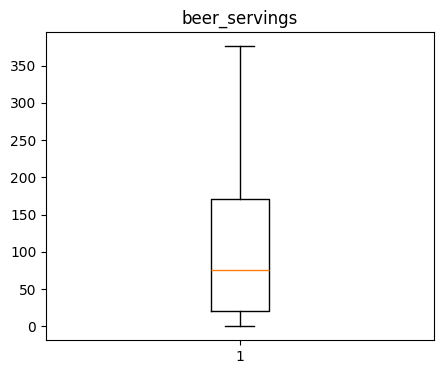

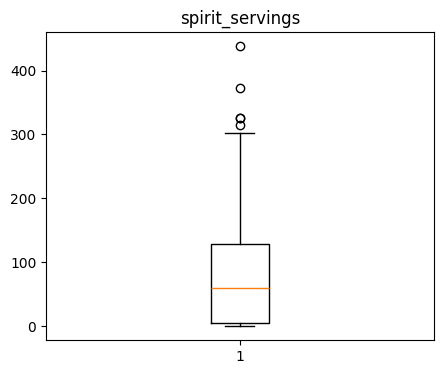

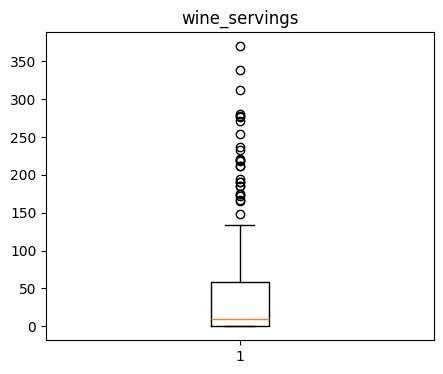

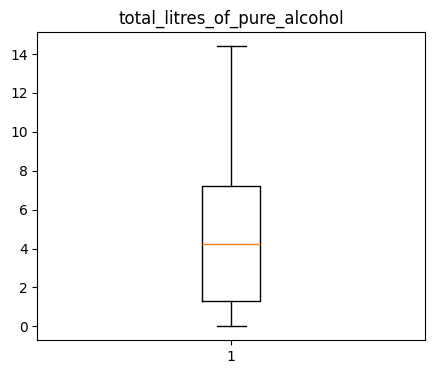

In [ ]:
for i in num_cols:
  plt.figure(figsize=(5,4))
  plt.boxplot(beer[i])
  plt.title(i)

In [ ]:
#spirit servings
q1=np.quantile(beer['spirit_servings'],0.25)
q3=np.quantile(beer['spirit_servings'],0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print(upper_bound)
print(lower_bound)
print(iqr)

312.5
-179.5
123.0


In [ ]:
spirit_outliers=[]
for i in beer ['spirit_servings']:
  if i> upper_bound or i< lower_bound:
    spirit_outliers.append(i)
spirit_outliers

[373.0, 438.0, 326.0, 326.0, 315.0]

{'whiskers': [<matplotlib.lines.Line2D at 0x7d8531d51400>,
 'caps': [<matplotlib.lines.Line2D at 0x7d8531d51910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d8531d51100>],
 'medians': [<matplotlib.lines.Line2D at 0x7d8531d51eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d8531d521b0>],
 'means': []}

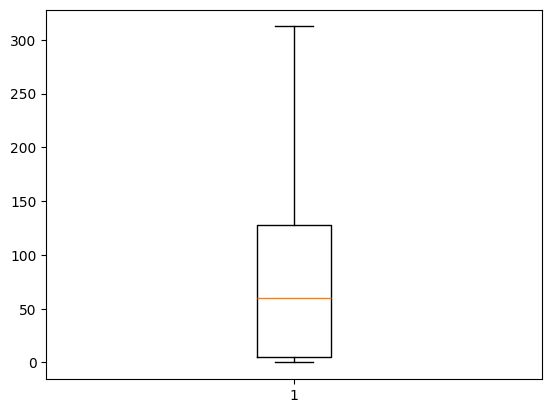

In [ ]:
beer['spirit_servings']=beer['spirit_servings'].clip(lower=lower_bound,upper=upper_bound)
plt.boxplot(beer['spirit_servings'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d8531d24d40>,
 'caps': [<matplotlib.lines.Line2D at 0x7d8531dc15b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d8531dc0ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d8531dc1b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d8531dc1e20>],
 'means': []}

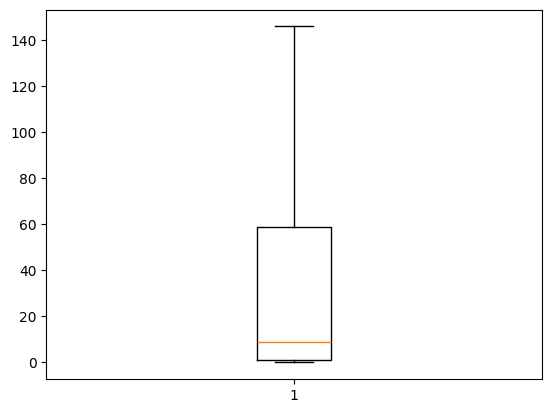

In [ ]:
#wine sevings
q1=np.quantile(beer['wine_servings'],0.25)
q3=np.quantile(beer['wine_servings'],0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
beer['wine_servings']=beer['wine_servings'].clip(lower=lower_bound,upper=upper_bound)
plt.boxplot(beer['wine_servings'])

In [ ]:
import seaborn as sns

In [ ]:
titanic=sns.load_dataset("titanic")
df=pd.DataFrame(titanic)
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(891, 15)

In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.drop('deck', axis=1, inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<Axes: >

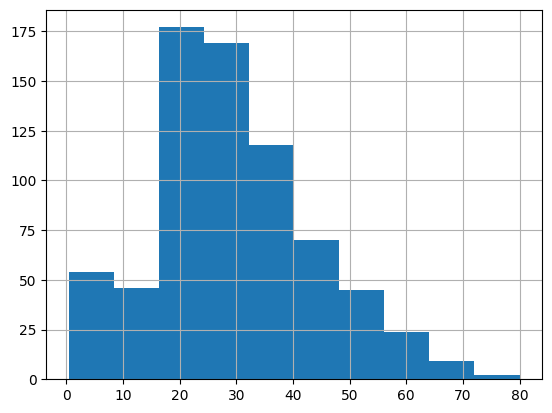

In [ ]:
df['age'].hist()

<Axes: >

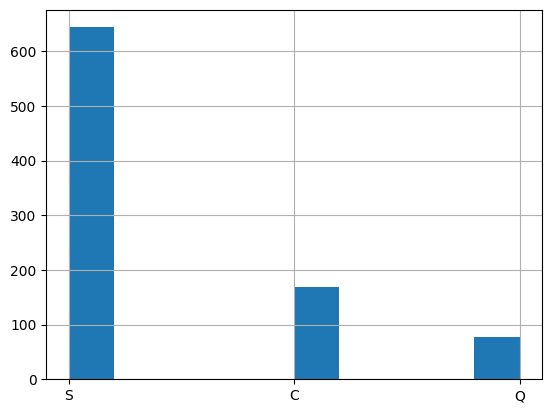

In [ ]:
df['embarked'].hist()

<Axes: >

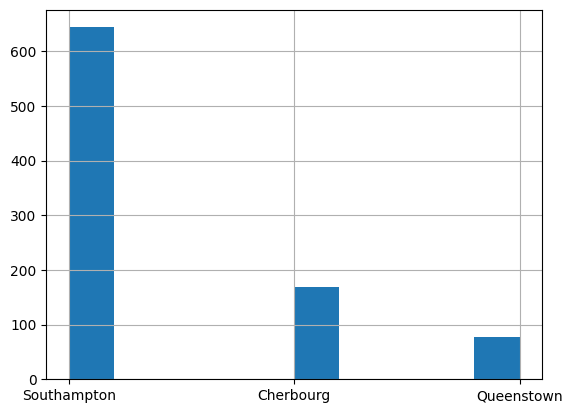

In [ ]:
df['embark_town'].hist()

In [ ]:
df.fillna({'age':df['age'].median(),
          'embarked':df['embarked'].mode(),
          'embark_town':df['embark_town'].mode()},inplace=True)
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
df.drop('pclass', axis=1, inplace=True)
df.drop('embarked', axis=1, inplace=True)
df.drop('alive', axis=1, inplace=True)
df.drop('alone', axis=1, inplace=True)
df.drop('adult_male', axis=1, inplace=True)
df.drop('who', axis=1, inplace=True)
df

,survived,sex,age,sibsp,parch,fare,class,embark_town
0,0,male,22.0,1,0,7.2500,Third,Southampton
1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,Southampton
3,1,female,35.0,1,0,53.1000,First,Southampton
4,0,male,35.0,0,0,8.0500,Third,Southampton
...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,Southampton
887,1,female,19.0,0,0,30.0000,First,Southampton
888,0,female,28.0,1,2,23.4500,Third,Southampton
889,1,male,26.0,0,0,30.0000,First,Cherbourg


In [ ]:
from scipy.stats import skew

In [ ]:
skew(df['age'])

np.float64(0.5093852558219663)

In [ ]:
median =np.median(df['age'])
mad=median_abs_deviation(df['age'],scale='normal')
age_lb=median-(3*mad)
age_ub=median+(3*mad)

In [ ]:
print(median)
print(mad)

28.0
8.895613311033612


In [ ]:
outliers=[i for i in df['age'] if i< age_lb or i> age_ub]
len(outliers)

56

{'whiskers': [<matplotlib.lines.Line2D at 0x7d85315f5d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7d85315c45c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d85315a6690>],
 'medians': [<matplotlib.lines.Line2D at 0x7d85315f6750>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d85315f69f0>],
 'means': []}

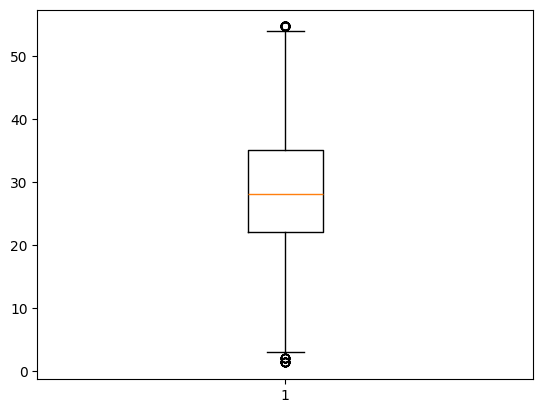

In [ ]:
df['age']=df['age'].clip(lower=age_lb,upper=age_ub)
plt.boxplot(df['age'])

In [ ]:
df.to_csv('titanic.csv')